# Temperature Forecasting:
    Temperature forecasting using Recurrent Neural Nets applied on time-series dataset recorded at the Weather Station at the Max Planck Institute for Biogeochemistry in Jena, Germany between 2009-2016.

### Imports :

In [63]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
import tensorflow as tf 
from tensorflow.python.client import device_lib
sess = tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(log_device_placement=True))
print(device_lib.list_local_devices())



Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: NVIDIA GeForce GTX 860M, pci bus id: 0000:01:00.0, compute capability: 5.0

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14683077136267982270
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3555262464
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12043993912023863877
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 860M, pci bus id: 0000:01:00.0, compute capability: 5.0"
xla_global_id: 416903419
]


In [65]:
from keras import models, layers 
from tensorflow.keras.optimizers import RMSprop


In [66]:
from keras import backend as K
K._get_available_gpus()

['/device:GPU:0']

In [67]:
sns.set_style('darkgrid')
sns.color_palette("deep")

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

### Exploratory analysis :

In [68]:
df = pd.read_csv("./dataset/jena_climate_2009_2016.csv")
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420451 entries, 0 to 420450
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date Time        420451 non-null  object 
 1   p (mbar)         420451 non-null  float64
 2   T (degC)         420451 non-null  float64
 3   Tpot (K)         420451 non-null  float64
 4   Tdew (degC)      420451 non-null  float64
 5   rh (%)           420451 non-null  float64
 6   VPmax (mbar)     420451 non-null  float64
 7   VPact (mbar)     420451 non-null  float64
 8   VPdef (mbar)     420451 non-null  float64
 9   sh (g/kg)        420451 non-null  float64
 10  H2OC (mmol/mol)  420451 non-null  float64
 11  rho (g/m**3)     420451 non-null  float64
 12  wv (m/s)         420451 non-null  float64
 13  max. wv (m/s)    420451 non-null  float64
 14  wd (deg)         420451 non-null  float64
dtypes: float64(14), object(1)
memory usage: 48.1+ MB


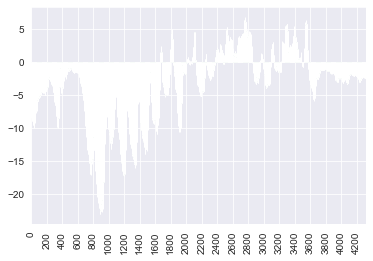

In [70]:
from matplotlib.pyplot import xticks
df["T (degC)"][:144*30].plot(kind="bar",xticks=np.arange(0,144*30,step=200), rot=90, color=sns.color_palette("deep")[2]);

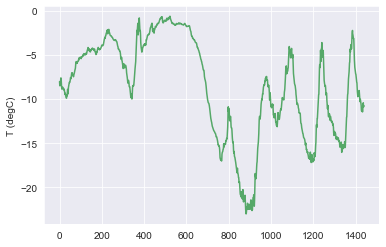

In [71]:
# data is recorded every 10 mins so 144 data point correspond to one day's recordings
# we will plot the first 10 days as a visualization of the data
plt.plot([i for i in range(144*10)], df["T (degC)"][:144*10], color = sns.color_palette("deep")[2])
plt.ylabel("T (degC)")
plt.show()

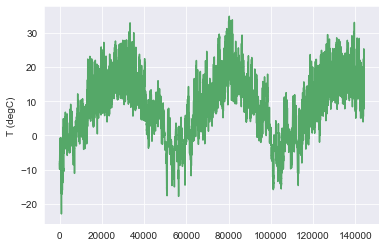

In [72]:
# we will plot the first 1000 days to get a sense of how the data behaves on the long run
plt.plot([i for i in range(144*1000)], df["T (degC)"][:144*1000], color = sns.color_palette("deep")[2])
plt.ylabel("T (degC)")
plt.show()

The chaotic nature of the temperature data can be observed

##### Showing data distribution :

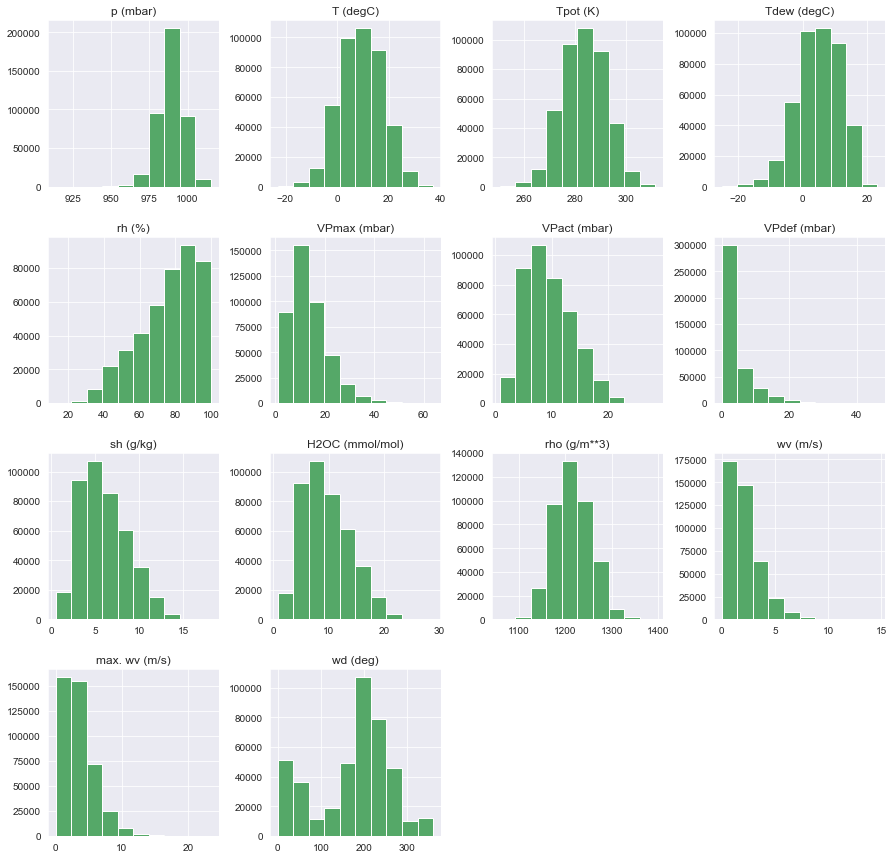

In [73]:
df.hist(figsize=(15,15), color=sns.color_palette("deep")[2]);

### Data Preparation :

In [77]:
df_normalized = df.copy()
df_normalized.drop(columns=["Date Time"], inplace=True)

In [78]:
df_normalized.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [79]:
mean = df[:200000].mean()
df_normalized -= mean 

C:\Users\kareem\AppData\Local\Temp\ipykernel_10976\2950690790.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = df[:200000].mean()


In [80]:
std = df[:200000].std()
df_normalized /= std 

C:\Users\kareem\AppData\Local\Temp\ipykernel_10976\627915115.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = df[:200000].std()


In [81]:
df_normalized.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,0.900145,-1.931354,-1.982105,-1.862796,1.072850,-1.307418,-1.473754,-0.798684,-1.476264,-1.478152,2.123745,-0.729503,-0.780678,-0.276135
1,0.906041,-1.975409,-2.025665,-1.915825,1.078828,-1.320424,-1.495192,-0.800750,-1.495021,-1.499318,2.171993,-0.931238,-0.887943,-0.463173
2,0.901324,-1.986705,-2.036834,-1.920011,1.108719,-1.323025,-1.497574,-0.802816,-1.498772,-1.501669,2.182349,-1.276140,-1.261224,-0.053306
3,0.898966,-1.964113,-2.013379,-1.886519,1.126654,-1.316522,-1.483282,-0.804882,-1.483767,-1.487559,2.157636,-1.178526,-1.317002,0.251496
4,0.898966,-1.959594,-2.010028,-1.882333,1.120676,-1.315222,-1.480900,-0.804882,-1.483767,-1.485207,2.153165,-1.191541,-1.261224,0.439689


#### Writing a generator that yields (samples, their targets) :

In [82]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows), lookback // step, data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data.loc[indices,:].values
            targets[j] = data.iloc[rows[j] + delay,1]
        yield samples, targets


#### Training, validation and test generators :

In [83]:
# problem constants
lookback = 1440 #10 days
step = 6        # 1 hour
delay = 144     # 1 day
batch_size = 128

In [84]:
#training generator 
train_gen = generator(df_normalized, 
                    lookback=lookback,
                    delay=delay,
                    min_index=0,
                    max_index=200000,
                    shuffle=True,
                    step=step,
                    batch_size=batch_size)

In [85]:
val_gen = generator(df_normalized,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    shuffle=True,
                    step=step,
                    batch_size=batch_size)

In [86]:
test_gen = generator(df_normalized,
                    lookback=lookback,
                    delay=delay,
                    min_index=300001,
                    max_index=None,
                    step=step,
                    batch_size=batch_size)

In [87]:
val_steps = 300000 - 200001 - lookback
test_steps = len(df_normalized) - 300001 - lookback
val_steps = val_steps // batch_size
test_steps = test_steps // batch_size

#### Building Model :

In [88]:
model = models.Sequential()

In [89]:
model.add(layers.GRU(32, input_shape=(None, df_normalized.shape[-1])))
model.add(layers.Dense(1))

#### Training model :

In [90]:
model.compile(optimizer=RMSprop(), loss="mae")

In [91]:
history = model.fit(train_gen,
                    steps_per_epoch=500,
                    epochs=20,
                    validation_data=val_gen,
                    validation_steps=val_steps,
                    verbose = 1)

Epoch 1/20
500/500 [==============================] - 121s 235ms/step - loss: 0.3056 - val_loss: 0.2743
Epoch 2/20
500/500 [==============================] - 118s 237ms/step - loss: 0.2850 - val_loss: 0.2664
Epoch 3/20
500/500 [==============================] - 121s 242ms/step - loss: 0.2779 - val_loss: 0.2651
Epoch 4/20
500/500 [==============================] - 118s 236ms/step - loss: 0.2722 - val_loss: 0.2655
Epoch 5/20
500/500 [==============================] - 117s 235ms/step - loss: 0.2689 - val_loss: 0.2664
Epoch 6/20
500/500 [==============================] - 116s 232ms/step - loss: 0.2635 - val_loss: 0.2648
Epoch 7/20
500/500 [==============================] - 110s 220ms/step - loss: 0.2589 - val_loss: 0.2691
Epoch 8/20
500/500 [==============================] - 110s 221ms/step - loss: 0.2548 - val_loss: 0.2747
Epoch 9/20
500/500 [==============================] - 112s 223ms/step - loss: 0.2500 - val_loss: 0.2760
Epoch 10/20
500/500 [==============================] - 114s 229m

#### Plotting Results:

In [92]:
#plotting functions
def plot_results(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

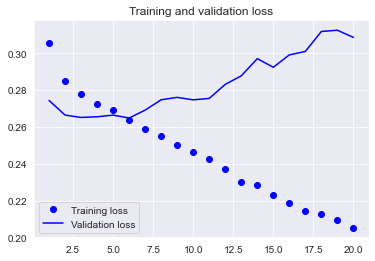

In [93]:
plot_results(history=history)

In [94]:
df_normalized.iloc[1,:].values

array([ 0.90604113, -1.97540887, -2.02566494, -1.91582479,  1.07882791,
       -1.32042368, -1.49519236, -0.80075037, -1.49502082, -1.49931766,
        2.17199309, -0.93123784, -0.88794266, -0.46317327])